In [138]:
import numpy as np
categories = ['MMBench', 'MMVet', 'SEEDBench', 'MMMU', 'MathVista']
data = {
    "InternLM-Xcomposer2-VL-7b":[76.37, 46.5, 74.19, 40.33, 56.7],
    "InternLM-Xcomposer2-VL-7b-DPO":[78.18,49.7,75.18,39.67,56.6],
    "Qwen-VL-Chat":[56.53,48.5,59.63,35.67,35.6],
    "Qwen-VL-Chat-DPO":[57.56,49.1,60.67,37.89,35.6],
    "LLaVA-Next-Mistral-7b":[67.70,43.8,71.7,37.00,35.1],
    "LLaVA-Next-Mistral-7b-DPO":[68.30,44.2,71.7,36.89,36.2],
    "LLaVA-Next-Vicuna-7b":[62.71,38.2,68.17,34.00,31.3],
    "LLaVA-Next-Vicuna-7b-DPO":[64.52,44.1,69.75,33.11,32.0]
}

baseline = [50,35,55,30,30]


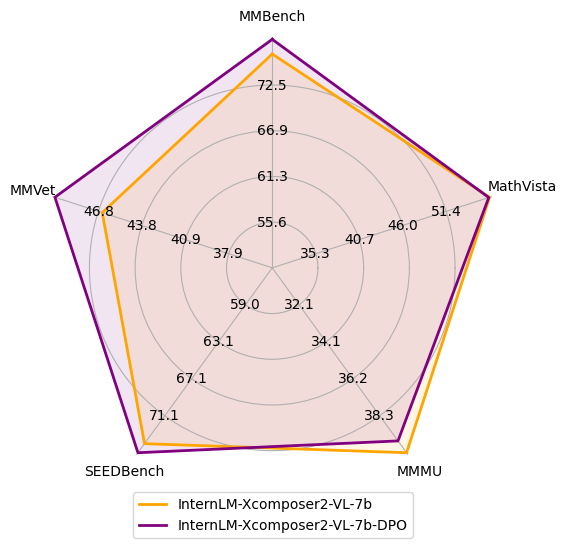

In [158]:
import matplotlib.pyplot as plt
from math import pi

# Define the data

N = len(categories)

model1 = "InternLM-Xcomposer2-VL-7b"
model2 = f"{model1}-DPO"

values1 = data[model1]
values2 = data[model2]
max_values = [max(values1[i], values2[i]) for i in range(N)]
# Normalize the data
values1_normalized = [(v-baseline[i]) / (max_values[i]-baseline[i]) for i, v in enumerate(values1)]
values2_normalized = [(v-baseline[i]) / (max_values[i]-baseline[i]) for i, v in enumerate(values2)]
# Add more normalization as needed

# Repeat the first value to close the circle
values1_normalized += values1_normalized[:1]
values2_normalized += values2_normalized[:1]

# Calculate angle for each category
angles = [n / float(N) * 2 * pi+0.5*pi for n in range(N)]

# normalize each angle to [0, 2pi]
angles = [a if a < 2*pi else a-2*pi for a in angles]

angles += angles[:1]

# Radar chart plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one line per dataset
ax.plot(angles, values1_normalized, color='orange', linewidth=2, linestyle='solid', label=model1)
ax.plot(angles, values2_normalized, color='purple', linewidth=2, linestyle='solid', label=model2)
# Add more lines for additional datasets

# Fill area
ax.fill(angles, values1_normalized, color='orange', alpha=0.1)
ax.fill(angles, values2_normalized, color='purple', alpha=0.1)
# Add more fills for additional datasets

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])
rticks = [0.2, 0.4, 0.6,0.8]
ax.set_rticks(rticks)
# remove the outline
ax.spines['polar'].set_visible(False)
#ax.tick_params(axis='both', which='major', pad=10)

# Add rtick labels
for i in range(N):
    for r in rticks:
        real_value = r * (max_values[i]-baseline[i]) + baseline[i]
        ax.text(angles[i], r, "{:.1f}".format(real_value), ha='center', va='center')

# Add xtick labels
for i in range(N):
    category = categories[i]
    loc = 1.1
    if category == "MathVista":
        loc = 1.15
    ax.text(angles[i], loc, categories[i], ha='center', va='center')

plt.legend(bbox_to_anchor=(0.82,0.03))
# Show the chart
plt.savefig(f'{model1}_comparison.png', dpi=300,bbox_inches='tight',transparent=True)
plt.show()

